**Basics of monte carlo simulations**

* **Generating uniform random numbers**

In [ ]:
""" Random number generation using python's RNG"""
import numpy as np
import random
import matplotlib.pyplot as plt
# Generating random numbers and computing their mean, variance and standard deviation
n = int(input("Enter number of random numbers you want to generate: "))
a = []
while True:
    x = random.uniform(0,1)
    a.append(x)
    if len(a) == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
# calculating relative errors
per_err_mean = ((mean-0.5)/0.5)*100
per_err_var = ((variance - (1/12))/(1/12))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)

# plotting 
plt.hist(a,5)
plt.show()

In [ ]:
""" Random number generation using numpy's RNG"""
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of random numbers you want to generate:"))
# Random number generation
rng = np.random.default_rng(42)
a = rng.uniform(0,1,n)
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
# calculating relative errors
per_err_mean = ((mean-0.5)/0.5)*100
per_err_var = ((variance - (1/12))/(1/12))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)

# plotting 
plt.hist(a,5)
plt.show()

* **Generating non-uniform random numbers**

* **We are generating random numbers using cummulative distribution function**
* **The given function is $f(x) = \lambda e^{-\lambda x}$**
* **$F(x) = U = 1 - e^{-\lambda x}$, $X = F^{-1}(U)$, $x = -(1/\lambda) log(U)$**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def inv_cdf(lmbda, u):
    x = -(1/lmbda)*np.log(u)
    return x
n = int(input("Enyer the number of random numbers you want to generate"))
rng = np.random.default_rng(42)
a = rng.uniform(0,1,n)
l = 1
y = inv_cdf(l,a)
standard_deviation = np.std(y)
# calculating true function
y1 = np.linspace(0, 7, num=100000)
x1 = l*np.exp(-l*y1)
# calculating relative errors
per_err_mean = ((mean-(1/l))/(1/l))*100
per_err_var = ((variance - (1/l**2))/(1/l**2))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)

# plotting 
plt.xlim(0, 8)
plt.ylim(0.0, 1.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(y, bins=16, density=True, color='skyblue', edgecolor='black')
plt.plot(y1,x1)
plt.show()

* **Rejection Sampling: Acceptence and Rejection**

$p(x) = 2x$ on $[0,1]$,    $q(x)\in U(0,1)$,     $M = 2$,    
keep $x$ if $u<=p(x)/Mq(x)$
here in this case $u<=x$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you need to be accepted: "))
rng = np.random.default_rng(42)
i,j = 0,0
a = []
x_all = []
u_all = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(0,1)
    u_all.append(u)
    x_all.append(x)
    if u <= x:
        a.append(x)
        accepted.append(True)
        i = i+1
    else:
        accepted.append(False)
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
acc_rate = i/j
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Acceptance rate is:", acc_rate)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
# True Value
x1 = np.linspace(0,1,10000)
y1 = 2*x1

# Plotting
plt.hist(a, bins=16, density=True, color='skyblue', edgecolor='black')
plt.plot(x1,y1)
plt.show()
plt.figure(figsize=(6,6))

# Convert to numpy arrays
x_all = np.array(x_all)
u_all = np.array(u_all)
accepted = np.array(accepted)

# Plot accepted points
plt.scatter(
    x_all[accepted],
    u_all[accepted],
    s=1,
    color='blue',
    alpha=0.5,
    label='Accepted'
)

# Plot rejected points
plt.scatter(
    x_all[~accepted],
    u_all[~accepted],
    s=1,
    color='red',
    alpha=0.3,
    label='Rejected'
)

# Acceptance boundary u = x
xx = np.linspace(0,1,200)
plt.plot(xx, xx, color='black', lw=2, label='u = x')

plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.title("Acceptance–Rejection Sampling Geometry")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()



* **Monte Carlo integration**

$f(x) = \int_{0}^{1} x^{2}dx$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = [100, 1000, 10000, 100000, 1000000]
rng = np.random.default_rng(42)
print("n", "\tIntegral", "\tError")
for j in range(len(n)):
    s,i = 0.0,0
    while True:
        x = rng.uniform(0,1)
        s = s + x**2
        i = i + 1
        if i == n[j]:
            break
    integral = s/n[j]
    true_int = 1/3
    e_n = abs(true_int-integral)
    print(n[j], "\t", f'{integral:.6f}', "\t", f'{e_n:.6f}')

* **Importance Sampling**

$f(x) = x^{2}$, $q(x) = 3x^{2}$,
**Compute** $I_N = (1/N)\sum_i x_i^{2}/q(x_i)$

In [ ]:
import numpy as np
def inv_cdf(u):
    return u**(1/3)
n = int(input("Enter number of samples you want to use:"))
rng = np.random.default_rng(42)
s,i = 0.0,0
while True:
    a = rng.uniform(0,1)
    y = inv_cdf(a)
    s = s + ((y**2)/(3*y**2))
    i = i+1
    if i==n:
        break
integral = s/n
print("Integral is", integral)

* **Metropolis Algorithm**

* **Gaussian function**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you want to generate:"))
sigma = 1.0
rng = np.random.default_rng(42)
x = np.zeros(n)
x[0] = 0.0
for i in range(1,n):
    x_current = x[i-1]
    x_proposal = x_current + rng.normal(0,sigma)
    log_accp_ratio = (-(x_proposal**2 - x_current**2)/2)
    rand = np.log(rng.uniform())
    if rand < log_accp_ratio:
        x[i] = x_proposal
    else:
        x[i] = x_current
xx = np.linspace(-4, 4, 400)
gaussian = np.exp(-xx**2 / 2) / np.sqrt(2*np.pi)
plt.hist(x, bins=100, density=True, alpha=0.6)
plt.plot(xx, gaussian, 'r', lw=2)
plt.xlabel("x")
plt.ylabel("Probability density")
plt.show()
plt.plot(x[:1000])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you want to generate:"))
sigma = 1.0
delta_xm_val = np.logspace(0.29,0.31,50)
rng = np.random.default_rng(42)
for k in range(len(delta_xm_val)):
    x = np.zeros(n)
    x[0] = 0.0
    j = 0
    for i in range(1,n):
        x_current = x[i-1]
        x_proposal = x_current + rng.normal(0,delta_xm_val[k])
        log_accp_ratio = (-(x_proposal**2 - x_current**2)/(2*sigma**2))
        rand = np.log(rng.uniform())
        if rand < log_accp_ratio:
            x[i] = x_proposal
            j = j+1
        else:
            x[i] = x_current
    accp_rate = j/(n-1)
    print(f'{delta_xm_val[k]:.6f}', "\t", f'{accp_rate:.6f}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you want to generate:"))
burn_in = n//5
sigma = 1.0
rng = np.random.default_rng(42)
x = np.zeros(n)
x[0] = 0.0
j = 0
delta_xm = 1.996375
for i in range(1,n):
    x_current = x[i-1]
    x_proposal = x_current + rng.normal(0,delta_xm)
    log_accp_ratio = (-(x_proposal**2 - x_current**2)/(2*sigma**2))
    rand = np.log(rng.uniform())
    if rand < log_accp_ratio:
        x[i] = x_proposal
        j = j+1
    else:
        x[i] = x_current
samples = x[burn_in:]
# ESTIMATES
mean_x = np.mean(samples)
mean_x2 = np.mean(samples**2)

print("⟨x⟩  =", mean_x)
print("⟨x²⟩ =", mean_x2)
print("Exact ⟨x²⟩ =", sigma**2)
print("Acceptance rate =", j/(n-1))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def autocorrelation(x, max_lag):
    x = np.asarray(x)
    x = x - np.mean(x)
    var = np.var(x)
    acf = np.zeros(max_lag)
    for k in range(max_lag):
        acf[k] = np.mean(x[:len(x)-k] * x[k:]) / var
    return acf
n = int(input("Enter number of samples you want to generate:"))
burn_in = n//5
sigma = 1.0
rng = np.random.default_rng(42)
x = np.zeros(n)
x[0] = 0.0
j = 0
delta_xm = 1.996375
for i in range(1,n):
    x_current = x[i-1]
    x_proposal = x_current + rng.normal(0,delta_xm)
    log_accp_ratio = (-(x_proposal**2 - x_current**2)/(2*sigma**2))
    rand = np.log(rng.uniform())
    if rand < log_accp_ratio:
        x[i] = x_proposal
        j = j+1
    else:
        x[i] = x_current
samples = x[burn_in:]
# ESTIMATES
mean_x = np.mean(samples)
mean_x2 = np.mean(samples**2)
print("Total samples generated:", n)
print("⟨x⟩  =", mean_x)
print("⟨x²⟩ =", mean_x2)
print("Exact ⟨x²⟩ =", sigma**2)
print("Acceptance rate =", j/(n-1))
max_lag = 200
acf = autocorrelation(samples, max_lag)
tau_int = 1 + 2*np.sum(acf[1:])
print("Integrated autocorrelation time:", tau_int)
N_eff = len(samples) / (2 * tau_int)
print("Effective sample size:", N_eff)
plt.figure(figsize=(6,4))
plt.plot(acf, marker='o', markersize=3)
plt.xlabel("Lag k")
plt.ylabel("Autocorrelation C(k)")
plt.title("Autocorrelation function")
plt.axhline(0, color='black', lw=0.5)
plt.show()


In [ ]:
import numpy as np

# -----------------------------
# PARAMETERS
# -----------------------------
sigma = 1.0
target_accept = 0.5

n_tune = 5000        # steps per tuning round
n_rounds = 50        # number of adaptation rounds
gamma = 0.2         # adaptation strength

rng = np.random.default_rng(42)

# initial guess
delta_xm = sigma
x = 0.0
print("Tuning Δx_m for sigma =", sigma)
print("Round   Δx_m      Acceptance")

# -----------------------------
# TUNING LOOP
# -----------------------------
for r in range(n_rounds):
    
    accepts = 0

    for i in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_alpha = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_alpha:
            x = x_prop
            accepts += 1

    acc_rate = accepts / n_tune

    # multiplicative update
    delta_xm *= np.exp(gamma * (acc_rate - target_accept))

    print(f"{r:3d}   {delta_xm:.6f}   {acc_rate:.4f}")


In [ ]:
import numpy as np
sigma = 1
tar_acc = 0.5
gamma = 0.1
rng = np.random.default_rng(42)
detla_xm = sigma
while True:
    x = 0.0
    acc = 0
    i = 0
    while True:
        x_prop = x+rng.normal(0,delta_xm)
        log_acc = -(x_prop**2 - x**2)/(2*sigma**2)
        rand = np.log(rng.uniform())
        i = i + 1
        if rand < log_acc:
            x = x_prop
            acc += 1
        if i == 2000:
            break
    acc_rate = acc/i
    delta_xm*=np.exp(gamma*(acc_rate - tar_acc))
    if abs(acc_rate - tar_acc)<0.02:
        break
print(delta_xm)

In [ ]:
import numpy as np

sigma = 1.0
target_acc = 0.5
gamma = 0.14

n_tune = 2000
tol = 0.02
stable_rounds = 3

rng = np.random.default_rng(42)

delta_xm = sigma
x = 0.0
stable_count = 0

while True:
    accepted = 0

    for i in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_acc:
            x = x_prop
            accepted += 1

    acc_rate = accepted / n_tune

    delta_xm *= np.exp(gamma * (acc_rate - target_acc))

    if abs(acc_rate - target_acc) < tol:
        stable_count += 1
    else:
        stable_count = 0

    if stable_count >= stable_rounds:
        break

print("Optimized delta_xm =", delta_xm)


In [ ]:
import numpy as np

def tune_delta_xm_user(seed, sigma=1.0):
    rng = np.random.default_rng(seed)
    delta_xm = sigma
    gamma = 0.1
    target_acc = 0.5
    n_tune = 2000

    while True:
        x = 0.0
        accepted = 0

        for i in range(n_tune):
            x_prop = x + rng.normal(0, delta_xm)
            log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)
            if np.log(rng.uniform()) < log_acc:
                x = x_prop
                accepted += 1

        acc_rate = accepted / n_tune
        delta_xm *= np.exp(gamma * (acc_rate - target_acc))

        if abs(acc_rate - target_acc) < 0.02:
            break

    return delta_xm


In [ ]:
def tune_delta_xm_rm(seed, sigma=1.0):
    rng = np.random.default_rng(seed)
    delta_xm = sigma
    gamma = 0.15
    target_acc = 0.5

    n_tune = 2000
    tol = 0.02
    stable_rounds = 3

    x = 0.0
    stable_count = 0

    while True:
        accepted = 0

        for i in range(n_tune):
            x_prop = x + rng.normal(0, delta_xm)
            log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)
            if np.log(rng.uniform()) < log_acc:
                x = x_prop
                accepted += 1

        acc_rate = accepted / n_tune
        delta_xm *= np.exp(gamma * (acc_rate - target_acc))

        if abs(acc_rate - target_acc) < tol:
            stable_count += 1
        else:
            stable_count = 0

        if stable_count >= stable_rounds:
            break

    return delta_xm


In [ ]:
seeds = range(20)

user_vals = []
rm_vals = []

for s in seeds:
    user_vals.append(tune_delta_xm_user(s))
    rm_vals.append(tune_delta_xm_rm(s))

user_vals = np.array(user_vals)
rm_vals = np.array(rm_vals)

print("USER METHOD:")
print("values:", user_vals)
print("mean =", user_vals.mean())
print("std  =", user_vals.std())

print("\nROBBINS–MONRO METHOD:")
print("values:", rm_vals)
print("mean =", rm_vals.mean())
print("std  =", rm_vals.std())


In [ ]:
import numpy as np

sigma = 1.0
target_acc = 0.5

n_tune = 2000
n_rounds = 50

gamma = 0.05
mu = np.log(sigma)

rng = np.random.default_rng(42)

theta = np.log(sigma)
theta_bar = 0.0
g_bar = 0.0

x = 0.0

print("Dual Averaging Tuning (Corrected)")
print("Round   delta_xm   acceptance")

for n in range(1, n_rounds + 1):
    delta_xm = np.exp(theta)
    accepted = 0

    for _ in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_acc:
            x = x_prop
            accepted += 1

    acc_rate = accepted / n_tune

    g = acc_rate - target_acc
    g_bar = (n - 1) / n * g_bar + g / n

    # ✅ corrected sign
    theta = mu + (np.sqrt(n) / gamma) * g_bar

    # running average of theta
    theta_bar = (n - 1) / n * theta_bar + theta / n

    print(f"{n:4d}   {np.exp(theta_bar):.6f}   {acc_rate:.6f}")

delta_xm_opt = np.exp(theta_bar)
print("\nOptimized delta_xm =", f"{delta_xm_opt:.6f}")


In [ ]:
import numpy as np

# -----------------------------
# PARAMETERS
# -----------------------------
sigma = 1.0
target_acc = 0.5

n_tune = 5000       # Metropolis steps per round
n_rounds = 200     # total adaptation rounds

gamma = 0.1
mu = np.log(sigma)

burnin_frac = 0.3    # fraction of rounds to discard
burnin = int(burnin_frac * n_rounds)

rng = np.random.default_rng(42)

# -----------------------------
# INITIALIZATION
# -----------------------------
theta = np.log(sigma)      # log(delta_xm)
g_bar = 0.0
x = 0.0

theta_samples = []         # for windowed averaging

print("Dual Averaging (Windowed)")
print("Round   delta_xm   acceptance")

# -----------------------------
# DUAL AVERAGING LOOP
# -----------------------------
for n in range(1, n_rounds + 1):
    delta_xm = np.exp(theta)
    accepted = 0

    # Metropolis sub-chain
    for _ in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_acc:
            x = x_prop
            accepted += 1

    acc_rate = accepted / n_tune

    # Dual averaging update
    g = acc_rate - target_acc
    g_bar = (n - 1) / n * g_bar + g / n
    theta = mu + (np.sqrt(n) / gamma) * g_bar

    # Collect only after burn-in
    if n > burnin:
        theta_samples.append(theta)

    print(f"{n:3d}   {np.exp(theta):.6f}   {acc_rate:.4f}")

# -----------------------------
# FINAL OPTIMIZED VALUE
# -----------------------------
theta_opt = np.mean(theta_samples)
delta_xm_opt = np.exp(theta_opt)

print("\nOptimized delta_xm =", delta_xm_opt)


* Question 3
$f(x) = 2x$ in $[0,1]$ and $0$ everywhere else using inversion methods
$F(x) = U = x^2$ so $x = U^{1/2}$ in $[0,1]$ and zero every where else

Total data points are: 1000000
Mean is:  0.6667132449536
varience is:  0.0555199251775299
Standard Deviation is:  0.2356266648270732
Percentage error in mean is: 0.006986743039999466
Percentage error in variance is: -0.0641346804461776


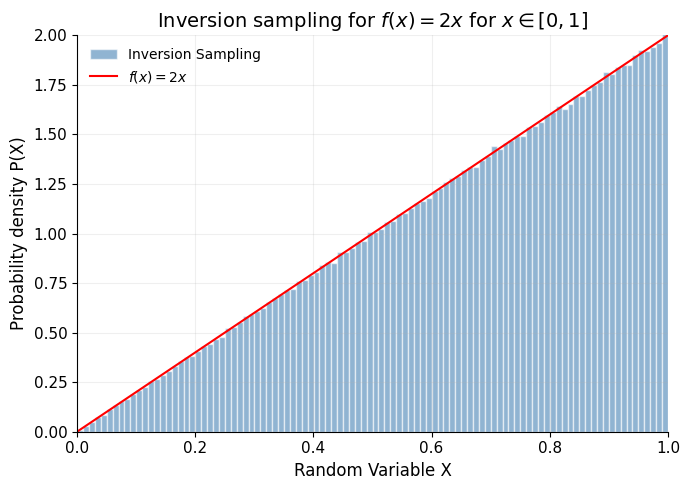

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def inverse(u):
    return np.sqrt(u)
n = 1000000
rng = np.random.default_rng(42)
a = rng.uniform(0,1,n)
x = inverse(a)
mean = np.mean(x)
variance = np.var(x)
standard_deviation = np.std(x)
# calculating true function
x1 = np.linspace(0, 1, num=100000)
y1 = 2*x1
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
# plotting 
plt.figure(figsize=(7, 5))
plt.tick_params(axis='both', labelsize=11)
plt.grid(alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0.0, 2.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(x, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Inversion Sampling")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Inversion sampling for $f(x) = 2x$ for $x\in[0,1]$", fontsize=14)
plt.tight_layout()
plt.plot(x1, y1, color="red", label="$f(x) = 2x$")
plt.legend(frameon=False)
plt.show()

Total data points are: 1000000
Mean is:  8.163153836817048e-05
varience is:  0.1666138889970399
Standard Deviation is:  0.4081836461655953


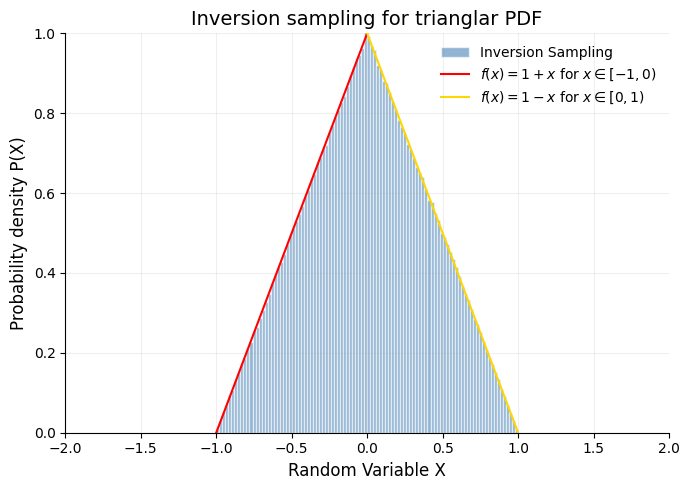

In [67]:
import numpy as np
import matplotlib.pyplot as plt
def inverse(u):
    if u < 0.5:
        return (-1 + np.sqrt(2*u))
    else:
        return (1 - np.sqrt(2*(1 - u)))
n = 1000000
rng = np.random.default_rng(42)
i = 0
x = []
while True:
    a = rng.uniform(0,1)
    y = inverse(a)
    x.append(y)
    i +=1
    if i == n:
        break
mean = np.mean(x)
variance = np.var(x)
standard_deviation = np.std(x)
print("Total data points are:", n)
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
x1 = np.linspace(-1, 0, num=50000)
y1 = x1 + 1
x2 = np.linspace(0, 1, num=50000)
y2 = 1 - x2
plt.figure(figsize=(7,5))
plt.grid(alpha=0.2)
plt.xlim(-2, 2)
plt.ylim(0.0, 1.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.title("Inversion sampling for trianglar PDF", fontsize=14)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.hist(x, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Inversion Sampling")
plt.plot(x1, y1, color="red", label="$f(x) = 1+x$ for $x\in[-1,0)$")
plt.plot(x2, y2, color="gold", label="$f(x) = 1-x$ for $x\in[0,1)$")
plt.tight_layout()
plt.legend(frameon=False)
plt.show()

* Acceptance rejection method for both functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
rng = np.random.default_rng(42)
i,j = 0,0
a = []
x_all = []
u_all = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(0,1)
    u_all.append(u)
    x_all.append(x)
    if u <= x:
        a.append(x)
        accepted.append(True)
        i = i+1
    else:
        accepted.append(False)
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
acc_rate = i/j
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Acceptance rate is:", acc_rate)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
x1 = np.linspace(0, 1, num=100000)
y1 = 2*x1
# plotting 
plt.figure(figsize=(7, 5))
plt.tick_params(axis='both', labelsize=11)
plt.grid(alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0.0, 2.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(a, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Acceptance-Rejection Sampling")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Acceptance-Rejection sampling for $f(x) = 2x$ for $x\in[0,1]$", fontsize=14)
plt.tight_layout()
plt.plot(x1, y1, color="red", label="$f(x) = 2x$")
plt.legend(frameon=False)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
rng = np.random.default_rng(42)
i,j = 0,0
a = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(0,1)
    if u <= x:
        a.append(x)
        i = i+1
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
acc_rate = i/j
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Acceptance rate is:", acc_rate)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
x1 = np.linspace(0, 1, num=100000)
y1 = 2*x1
# plotting 
plt.figure(figsize=(7, 5))
plt.tick_params(axis='both', labelsize=11)
plt.grid(alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0.0, 2.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(a, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Acceptance-Rejection Sampling")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Acceptance-Rejection sampling for $f(x) = 2x$ for $x\in[0,1]$", fontsize=14)
plt.tight_layout()
plt.plot(x1, y1, color="red", label="$f(x) = 2x$")
plt.legend(frameon=False)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
rng = np.random.default_rng(42)
i,j = 0,0
a = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(-1,1)
    if x < 0:
        if u <= 1 + x:
            a.append(x)
            i = i+1
    else:
        if u <= 1-x:
            a.append(x)
            i = i+1
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
print("Total data points are:", n)
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
x1 = np.linspace(-1, 0, num=50000)
y1 = x1 + 1
x2 = np.linspace(0, 1, num=50000)
y2 = 1 - x2
plt.figure(figsize=(7,5))
plt.grid(alpha=0.2)
plt.xlim(-2, 2)
plt.ylim(0.0, 1.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.title("Inversion sampling for trianglar PDF", fontsize=14)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.hist(a, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Inversion Sampling")
plt.plot(x1, y1, color="red", label="$f(x) = 1+x$ for $x\in[-1,0)$")
plt.plot(x2, y2, color="gold", label="$f(x) = 1-x$ for $x\in[0,1)$")
plt.tight_layout()
plt.legend(frameon=False)
plt.show()


r_c = 1.00, U_total = 919.986
r_c = 1.16, U_total = 903.936
r_c = 1.32, U_total = 909.942
r_c = 1.47, U_total = 916.595
r_c = 1.63, U_total = 914.794
r_c = 1.79, U_total = 912.088
r_c = 1.95, U_total = 913.801
r_c = 2.11, U_total = 911.337
r_c = 2.26, U_total = 912.137
r_c = 2.42, U_total = 912.220
r_c = 2.58, U_total = 912.451
r_c = 2.74, U_total = 912.548
r_c = 2.89, U_total = 912.332
r_c = 3.05, U_total = 912.334
r_c = 3.21, U_total = 912.435
r_c = 3.37, U_total = 912.428
r_c = 3.53, U_total = 912.488
r_c = 3.68, U_total = 912.478
r_c = 3.84, U_total = 912.404
r_c = 4.00, U_total = 912.487


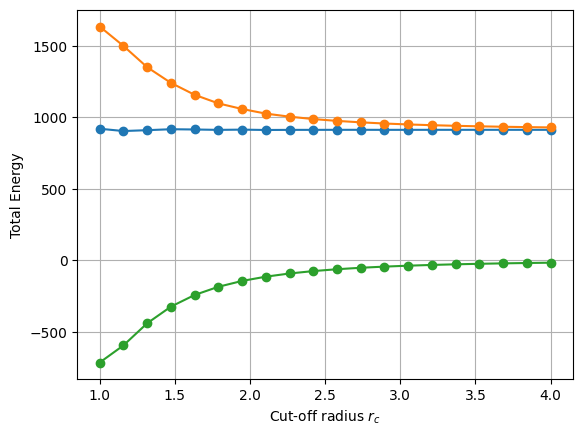

In [66]:
import numpy as np
import matplotlib.pyplot as plt
positions = np.loadtxt("/home/kelvin/Downloads/coords_LJ.dat", skiprows=2)
def LJ_pot(epsilon, sigma, r):
    term = (sigma/r)**6
    potential = 4*epsilon*((term)**2 - term)
    return potential
n = positions.shape[0]
r_cuts = np.linspace(1, 4, 20)
l = 8
epsilon = 1
sigma = 1
U_short_list, U_long_list, U_total_list, = [], [], []
for r_cut in r_cuts:
    u = 0.0
    u_short = 0.0
    for i in range(n):
        for j in range(i+1, n):
            r_ij = positions[i] - positions[j]
            r_ij -= l*np.round(r_ij/l)
            r = np.linalg.norm(r_ij)
            if r < r_cut:
                u_short += LJ_pot(epsilon, sigma, r)
    rho = n**2/l**3
    u_long = (8*np.pi/3)*rho*epsilon*sigma**3*((1/3)*(sigma/r_cut)**9 - (sigma/r_cut)**3)
    u_total = u_short + u_long
    U_short_list.append(u_short)
    U_long_list.append(u_long)
    U_total_list.append(u_total)
    print(f"r_c = {r_cut:.2f}, U_total = {u_total:.3f}")
plt.plot(r_cuts, U_total_list, marker='o')
plt.plot(r_cuts, U_short_list, marker='o')
plt.plot(r_cuts, U_long_list, marker='o')
plt.xlabel(r"Cut-off radius $r_c$")
plt.ylabel("Total Energy")
plt.grid()
plt.show()

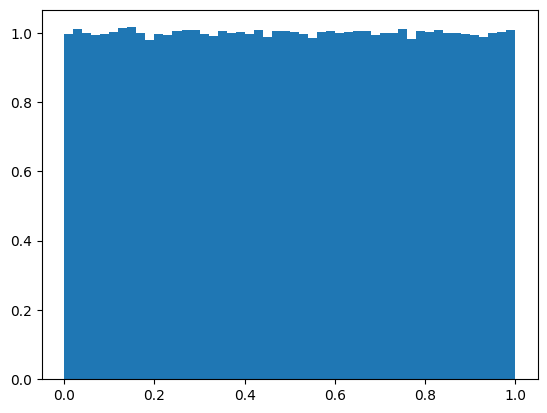

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt("/home/kelvin/github/ml_coding/mc_sampling/data/uniform.dat")
plt.hist(x, bins=50, density=True)
plt.show()


In [9]:
import os
os.getcwd()

'/home/kelvin/github/ml_coding'

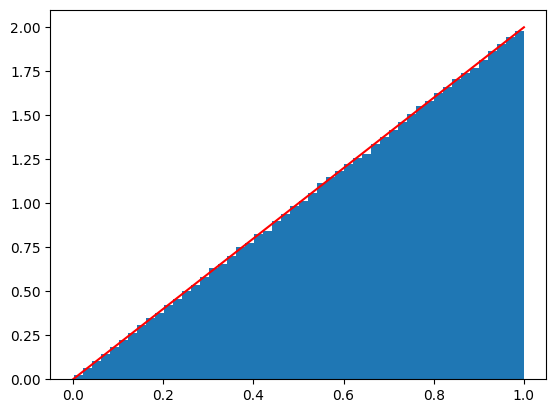

Mean: 0.666768268817


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt("/home/kelvin/github/ml_coding/data/inv_2x.dat")

plt.hist(x, bins=50, density=True)
xx = np.linspace(0,1,200)
plt.plot(xx, 2*xx, 'r')
plt.show()

print("Mean:", x.mean())   # should be ~2/3

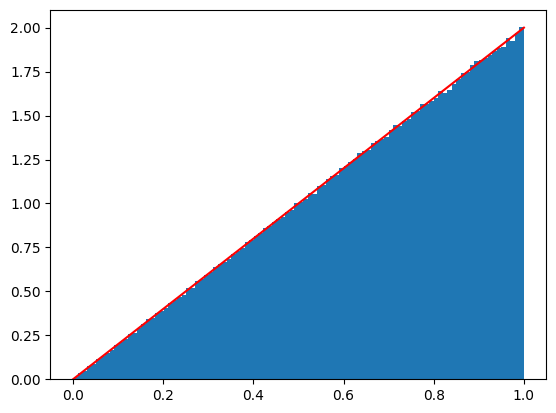

Mean: 0.666600086328


In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt("/home/kelvin/github/ml_coding/data/acc_rej_2x.dat")

plt.hist(x, bins=100, density=True)
xx = np.linspace(0,1,200)
plt.plot(xx, 2*xx, 'r')
plt.show()

print("Mean:", x.mean())